In [8]:
!brew install pip3

==> Auto-updating Homebrew...
Adjust how often this is run with HOMEBREW_AUTO_UPDATE_SECS or disable with
HOMEBREW_NO_AUTO_UPDATE. Hide these hints with HOMEBREW_NO_ENV_HINTS (see `man brew`).
==> Downloading https://ghcr.io/v2/homebrew/portable-ruby/portable-ruby/blobs/sha256:303bed4c7fc431a685db3c3c151d873740114adbdccd23762ea2d1e39ea78f47
######################################################################### 100.0%                                0.3%
==> Pouring portable-ruby-3.3.6.arm64_big_sur.bottle.tar.gz
==> Auto-updated Homebrew!
Updated 5 taps (ngrok/ngrok, homebrew/services, mongodb/brew, homebrew/core and homebrew/cask).
==> New Formulae
azqr                dipc                libmsquic           screenpipe
beautysh            dotnet@8            libtatsu            sigsum-go
bibtex-tidy         energy              mergiraf            tcl-tk@8
cbfmt               fileql              mkdocs-material     toml2json
cljfmt              gplugin             neocmakelsp         

In [12]:
%pip install pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 39.6 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 36.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
%pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.4 MB/s eta 0:00:0000:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 35.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON file
with open('drug-event-0002-of-0036.json', 'r') as file:
    data = json.load(file)

# View top-level keys
print("Top-level keys:", list(data.keys()))

# Extract the 'meta' and 'results' sections
meta = data['meta']
results = data['results']

print("Meta keys:", list(meta.keys()))
print("Sample result keys:", list(results[0].keys()))


Matplotlib is building the font cache; this may take a moment.


Top-level keys: ['meta', 'results']
Meta keys: ['disclaimer', 'terms', 'license', 'last_updated', 'results']
Sample result keys: ['safetyreportversion', 'safetyreportid', 'primarysourcecountry', 'occurcountry', 'transmissiondateformat', 'transmissiondate', 'reporttype', 'serious', 'seriousnessother', 'receivedateformat', 'receivedate', 'receiptdateformat', 'receiptdate', 'fulfillexpeditecriteria', 'companynumb', 'duplicate', 'reportduplicate', 'primarysource', 'sender', 'receiver', 'patient']


In [15]:
# Analyze the 'results' section
def get_nested_keys(d, parent_key=''):
    keys = []
    for k, v in d.items():
        new_key = f"{parent_key}.{k}" if parent_key else k
        keys.append(new_key)
        if isinstance(v, dict):
            keys.extend(get_nested_keys(v, new_key))
    return keys

nested_keys = get_nested_keys(results[0])
print("Nested keys in results:", nested_keys)


Nested keys in results: ['safetyreportversion', 'safetyreportid', 'primarysourcecountry', 'occurcountry', 'transmissiondateformat', 'transmissiondate', 'reporttype', 'serious', 'seriousnessother', 'receivedateformat', 'receivedate', 'receiptdateformat', 'receiptdate', 'fulfillexpeditecriteria', 'companynumb', 'duplicate', 'reportduplicate', 'reportduplicate.duplicatesource', 'reportduplicate.duplicatenumb', 'primarysource', 'primarysource.reportercountry', 'primarysource.qualification', 'sender', 'sender.sendertype', 'sender.senderorganization', 'receiver', 'receiver.receivertype', 'receiver.receiverorganization', 'patient', 'patient.patientsex', 'patient.reaction', 'patient.drug']


In [17]:
# Flatten 'results' data for easier visualization
reaction_data = []
drug_data = []

for entry in results:
    # Patient reaction details
    if 'patient' in entry and 'reaction' in entry['patient']:
        for reaction in entry['patient']['reaction']:
            reaction_data.append({
                'safetyreportid': entry['safetyreportid'],
                'reaction': reaction['reactionmeddrapt'],
                'outcome': reaction.get('reactionoutcome', 'Unknown')
            })

    # Drug details
    if 'patient' in entry and 'drug' in entry['patient']:
        for drug in entry['patient']['drug']:
            drug_data.append({
                'safetyreportid': entry['safetyreportid'],
                'medicinalproduct': drug['medicinalproduct'],
                'indication': drug.get('drugindication', 'Unknown'),
                'active_substance': drug.get('activesubstance', {}).get('activesubstancename', 'Unknown')  # Handle missing key
            })

reaction_df = pd.DataFrame(reaction_data)
drug_df = pd.DataFrame(drug_data)

# Display the structure of DataFrames
print("Reaction DataFrame:")
print(reaction_df.head())
print("\nDrug DataFrame:")
print(drug_df.head())


Reaction DataFrame:
  safetyreportid                    reaction  outcome
0       19580971             Prostate cancer        6
1       19581714  Colorectal cancer stage II        2
2       19599804                 Dehydration  Unknown
3       19599804                   Diarrhoea  Unknown
4       19597158             Prostate cancer        6

Drug DataFrame:
  safetyreportid    medicinalproduct indication          active_substance
0       19580971  RANITIDINE CAPSULE  DYSPEPSIA                RANITIDINE
1       19580971         RANITIDINE.  DYSPEPSIA                RANITIDINE
2       19580971              ZANTAC  DYSPEPSIA  RANITIDINE HYDROCHLORIDE
3       19580971              ZANTAC  DYSPEPSIA  RANITIDINE HYDROCHLORIDE
4       19580971         RANITIDINE.  DYSPEPSIA                RANITIDINE


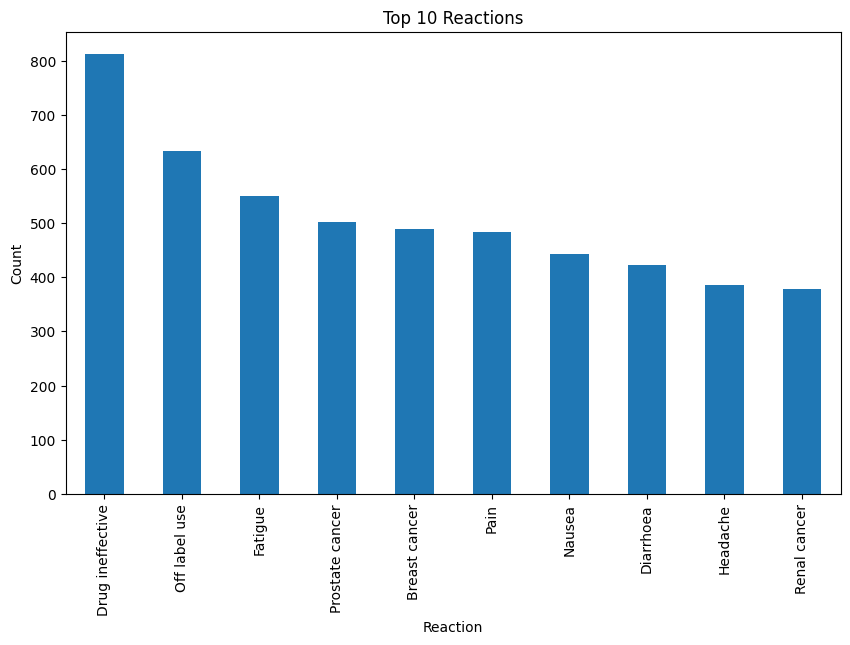

In [18]:
# Reaction count plot
reaction_counts = reaction_df['reaction'].value_counts()

plt.figure(figsize=(10, 6))
reaction_counts.head(10).plot(kind='bar')
plt.title('Top 10 Reactions')
plt.xlabel('Reaction')
plt.ylabel('Count')
plt.show()


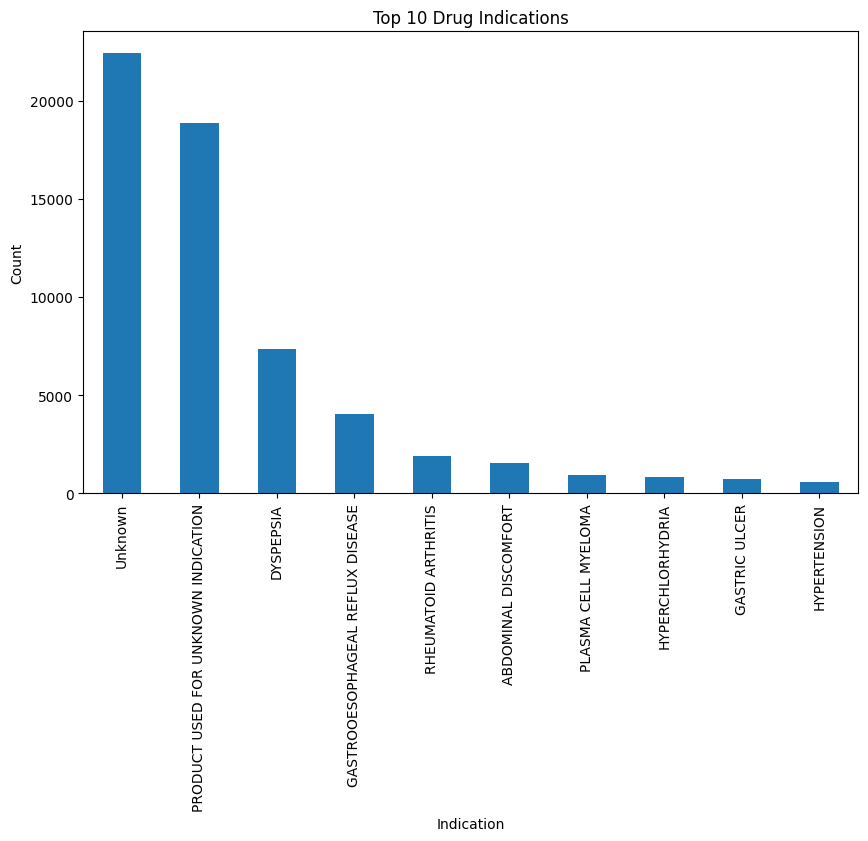

In [19]:
# Drug indication plot
indication_counts = drug_df['indication'].value_counts()

plt.figure(figsize=(10, 6))
indication_counts.head(10).plot(kind='bar')
plt.title('Top 10 Drug Indications')
plt.xlabel('Indication')
plt.ylabel('Count')
plt.show()


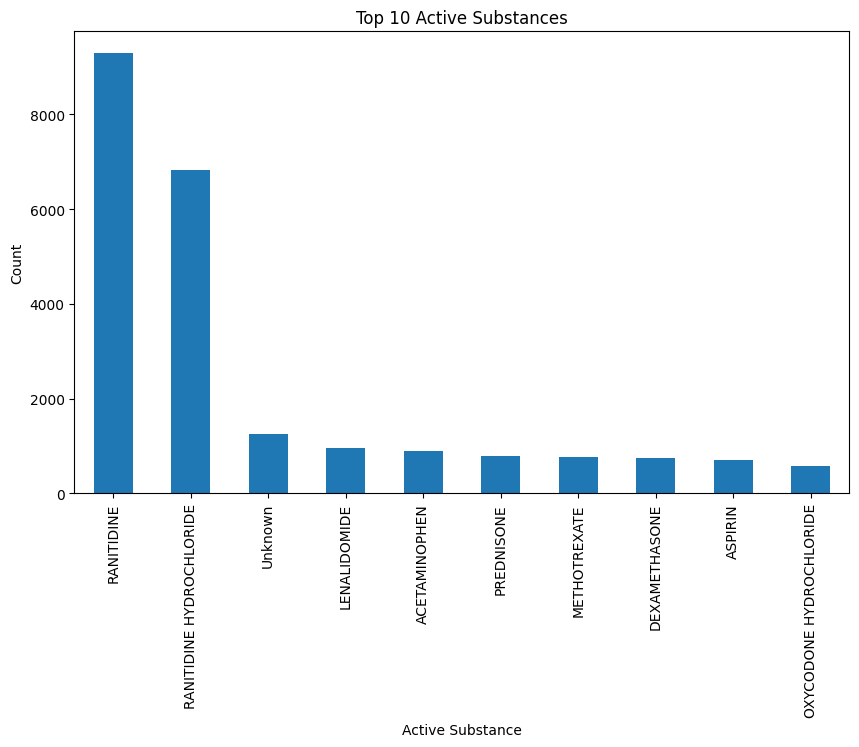

In [20]:
# Active substance plot
active_substance_counts = drug_df['active_substance'].value_counts()

plt.figure(figsize=(10, 6))
active_substance_counts.head(10).plot(kind='bar')
plt.title('Top 10 Active Substances')
plt.xlabel('Active Substance')
plt.ylabel('Count')
plt.show()


In [4]:
# import json
# import pandas as pd
# from relationalize import json_normalize
# import matplotlib.pyplot as plt

# # Load the JSON file
# with open('drug-event-0002-of-0036.json', 'r') as file:
#     data = json.load(file)

# # View top-level keys
# print("Top-level keys:", list(data.keys()))

# # Extract the 'meta' and 'results' sections
# meta = data['meta']
# results = data['results']

# print("Meta keys:", list(meta.keys()))
# print("Sample result keys:", list(results[0].keys()))

# # Analyze the 'results' section
# def get_nested_keys(d, parent_key=''):
#     keys = []
#     for k, v in d.items():
#         new_key = f"{parent_key}.{k}" if parent_key else k
#         keys.append(new_key)
#         if isinstance(v, dict):
#             keys.extend(get_nested_keys(v, new_key))
#     return keys

# nested_keys = get_nested_keys(results[0])
# print("Nested keys in results:", nested_keys)

# # Use relationalize to convert JSON to relational tables
# flat_data = json_normalize(results)

# # Display a sample of the flat data
# print(flat_data.head())

# # Save relationalized data to CSV
# flat_data.to_csv('drug_event_flat.csv', index=False)
# print("Relationalized data saved to 'drug_event_flat.csv'.")

# # Further analysis or visualization (example: distribution of 'serious' field if present)
# if 'serious' in flat_data.columns:
#     serious_counts = flat_data['serious'].value_counts()
#     plt.figure(figsize=(8, 5))
#     serious_counts.plot(kind='bar')
#     plt.title("Distribution of 'serious' Field")
#     plt.xlabel("Serious")
#     plt.ylabel("Count")
#     plt.show()

# # Inspect and analyze other fields
# print("Columns in relationalized dataset:")
# print(flat_data.columns)

# # Example: Check unique values in 'primarysource.reportercountry'
# if 'primarysource.reportercountry' in flat_data.columns:
#     print("Unique values in 'primarysource.reportercountry':")
#     print(flat_data['primarysource.reportercountry'].unique())


Top-level keys: ['meta', 'results']
Meta keys: ['disclaimer', 'terms', 'license', 'last_updated', 'results']
Sample result keys: ['safetyreportversion', 'safetyreportid', 'primarysourcecountry', 'occurcountry', 'transmissiondateformat', 'transmissiondate', 'reporttype', 'serious', 'seriousnessother', 'receivedateformat', 'receivedate', 'receiptdateformat', 'receiptdate', 'fulfillexpeditecriteria', 'companynumb', 'duplicate', 'reportduplicate', 'primarysource', 'sender', 'receiver', 'patient']
Nested keys in results: ['safetyreportversion', 'safetyreportid', 'primarysourcecountry', 'occurcountry', 'transmissiondateformat', 'transmissiondate', 'reporttype', 'serious', 'seriousnessother', 'receivedateformat', 'receivedate', 'receiptdateformat', 'receiptdate', 'fulfillexpeditecriteria', 'companynumb', 'duplicate', 'reportduplicate', 'reportduplicate.duplicatesource', 'reportduplicate.duplicatenumb', 'primarysource', 'primarysource.reportercountry', 'primarysource.qualification', 'sender', 

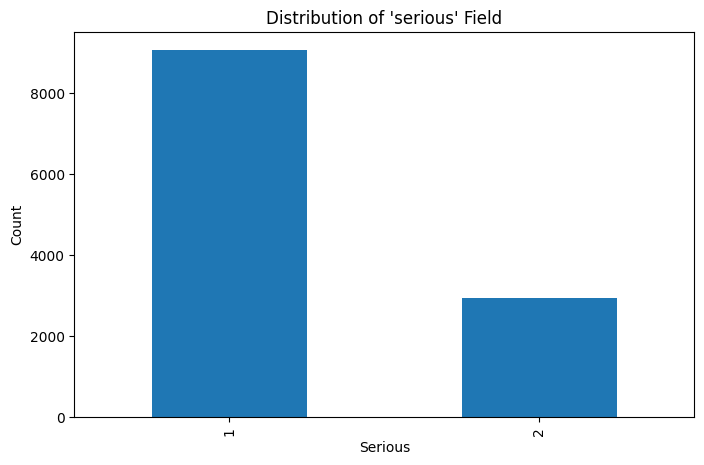

Columns in relationalized dataset:
Index(['safetyreportversion', 'safetyreportid', 'primarysourcecountry',
       'occurcountry', 'transmissiondateformat', 'transmissiondate',
       'reporttype', 'serious', 'seriousnessother', 'receivedateformat',
       'receivedate', 'receiptdateformat', 'receiptdate',
       'fulfillexpeditecriteria', 'companynumb', 'duplicate',
       'reportduplicate.duplicatesource', 'reportduplicate.duplicatenumb',
       'primarysource.reportercountry', 'primarysource.qualification',
       'sender.sendertype', 'sender.senderorganization',
       'receiver.receivertype', 'receiver.receiverorganization',
       'patient.patientsex', 'patient.reaction', 'patient.drug',
       'patient.patientonsetage', 'patient.patientonsetageunit',
       'patient.summary.narrativeincludeclinical',
       'seriousnesshospitalization', 'seriousnessdeath',
       'patient.patientweight', 'authoritynumb', 'patient.patientagegroup',
       'primarysource.literaturereference', 'seri

In [3]:
import json
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt

# Load the JSON file
with open('drug-event-0002-of-0036.json', 'r') as file:
    data = json.load(file)

# View top-level keys
print("Top-level keys:", list(data.keys()))

# Extract the 'meta' and 'results' sections
meta = data['meta']
results = data['results']

print("Meta keys:", list(meta.keys()))
print("Sample result keys:", list(results[0].keys()))

# Analyze the 'results' section
def get_nested_keys(d, parent_key=''):
    keys = []
    for k, v in d.items():
        new_key = f"{parent_key}.{k}" if parent_key else k
        keys.append(new_key)
        if isinstance(v, dict):
            keys.extend(get_nested_keys(v, new_key))
    return keys

nested_keys = get_nested_keys(results[0])
print("Nested keys in results:", nested_keys)

# Flatten the nested JSON using pandas' json_normalize
flat_data = json_normalize(results)

# Display a sample of the flat data
print(flat_data.head())

# Save relationalized data to CSV
flat_data.to_csv('drug_event_flat.csv', index=False)
print("Relationalized data saved to 'drug_event_flat.csv'.")

# Further analysis or visualization (example: distribution of 'serious' field if present)
if 'serious' in flat_data.columns:
    serious_counts = flat_data['serious'].value_counts()
    plt.figure(figsize=(8, 5))
    serious_counts.plot(kind='bar')
    plt.title("Distribution of 'serious' Field")
    plt.xlabel("Serious")
    plt.ylabel("Count")
    plt.show()

# Inspect and analyze other fields
print("Columns in relationalized dataset:")
print(flat_data.columns)

# Example: Check unique values in 'primarysource.reportercountry'
if 'primarysource.reportercountry' in flat_data.columns:
    print("Unique values in 'primarysource.reportercountry':")
    print(flat_data['primarysource.reportercountry'].unique())
